In [ ]:
# import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving Credit_Card_Applications.csv to Credit_Card_Applications.csv


{'Credit_Card_Applications.csv': b'CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class\r\n15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0\r\n15739548,0,22.67,7,2,8,4,0.165,0,0,0,0,2,160,1,0\r\n15662854,0,29.58,1.75,1,4,4,1.25,0,0,0,1,2,280,1,0\r\n15687688,0,21.67,11.5,1,5,3,0,1,1,11,1,2,0,1,1\r\n15715750,1,20.17,8.17,2,6,4,1.96,1,1,14,0,2,60,159,1\r\n15571121,0,15.83,0.585,2,8,8,1.5,1,1,2,0,2,100,1,1\r\n15726466,1,17.42,6.5,2,3,4,0.125,0,0,0,0,2,60,101,0\r\n15660390,0,58.67,4.46,2,11,8,3.04,1,1,6,0,2,43,561,1\r\n15663942,1,27.83,1,1,2,8,3,0,0,0,0,2,176,538,0\r\n15638610,0,55.75,7.08,2,4,8,6.75,1,1,3,1,2,100,51,0\r\n15644446,1,33.5,1.75,2,14,8,4.5,1,1,4,1,2,253,858,1\r\n15585892,1,41.42,5,2,11,8,5,1,1,6,1,2,470,1,1\r\n15609356,1,20.67,1.25,1,8,8,1.375,1,1,3,1,2,140,211,0\r\n15803378,1,34.92,5,2,14,8,7.5,1,1,6,1,2,0,1001,1\r\n15599440,1,58.58,2.71,2,8,4,2.415,0,0,0,1,2,320,1,0\r\n15692408,1,48.08,6.04,2,4,4,0.04,0,0,0,0,2,0,2691,1\r\n15683168,1,29.58,4.5,2,9,4,7.5,1,1

In [ ]:
# import the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc [: ,:-1].values    # independent variables
y = dataset.iloc [: , -1].values    # dependent variables

In [ ]:
# feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [ ]:
# import the SOM model
from minisom import MiniSom

In [ ]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=297ab458a604d7c77b377b956080fbef8d20e331270a12749b698ce875373fcf
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [ ]:
# init the model
som = MiniSom( x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

In [ ]:
# init the weight
som.random_weights_init(X)

In [ ]:
# traing the model
som.train_random(data = X, num_iteration = 100)

**Part 3: Visualizing the result**


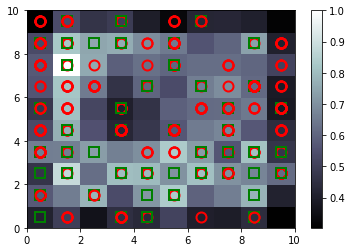

In [ ]:
# making a self organization map
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o' , 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

**Part 4: Cathch the Potential Fraud**


In [ ]:
# mapping the winning node
mappings = som.win_map(X)

NameError: ignored

In [ ]:
#catch the cheater
frauds = np.concatenate((mappings[(7,8)], mappings[(3,1)], mappings[(5,1)] ) , axis=0)

ValueError: ignored

In [ ]:
# rescale the value using inverse function
frauds = sc.inverse_transform(frauds)

NameError: ignored

In [ ]:
frauds


array([[1.5748499e+07, 1.0000000e+00, 4.4330000e+01, 5.0000000e-01,
        2.0000000e+00, 3.0000000e+00, 8.0000000e+00, 5.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 3.2000000e+02, 1.0000000e+00],
       [1.5781975e+07, 1.0000000e+00, 5.6000000e+01, 1.2500000e+01,
        2.0000000e+00, 4.0000000e+00, 8.0000000e+00, 8.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 2.4000000e+01, 2.0290000e+03],
       [1.5605791e+07, 1.0000000e+00, 1.9500000e+01, 9.5850000e+00,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 7.9000000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 8.0000000e+01, 3.5100000e+02],
       [1.5571415e+07, 1.0000000e+00, 3.7580000e+01, 0.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.0000000e+00,